# YouTube Spam Comments Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

# About Data
We work with 1956 comments from 5 different YouTube videos. The comments were collected via the YouTube API from five of the ten most viewed videos on YouTube in the first half of 2015. The comments were manually labeled as spam or legitimate. Spam was coded with a “1” and legitimate comments with a “0”.
Data files: 'Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv'

In [2]:
train_data = []
data_files=['C:\\Users\\user\\Downloads\\Youtube03-LMFAO.csv',
            'C:\\Users\\user\\Downloads\\Youtube04-Eminem.csv',
            'C:\\Users\\user\\Downloads\\Youtube02-KatyPerry.csv',
           'C:\\Users\\user\\Downloads\\Youtube05-Shakira.csv',
           'C:\\Users\\user\\Downloads\\Youtube01-Psy.csv']
for file in data_files:
    data = pd.read_csv(file)
    train_data.append(data)
train_data = pd.concat(train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [3]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [4]:
train_data['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

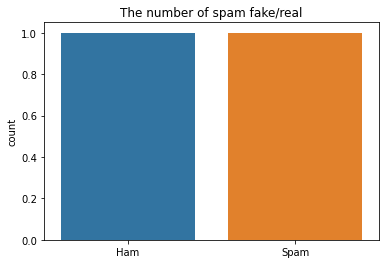

In [5]:
sns.countplot(x = ['Ham','Spam'],data = train_data['CLASS'].value_counts())
plt.title('The number of spam fake/real');

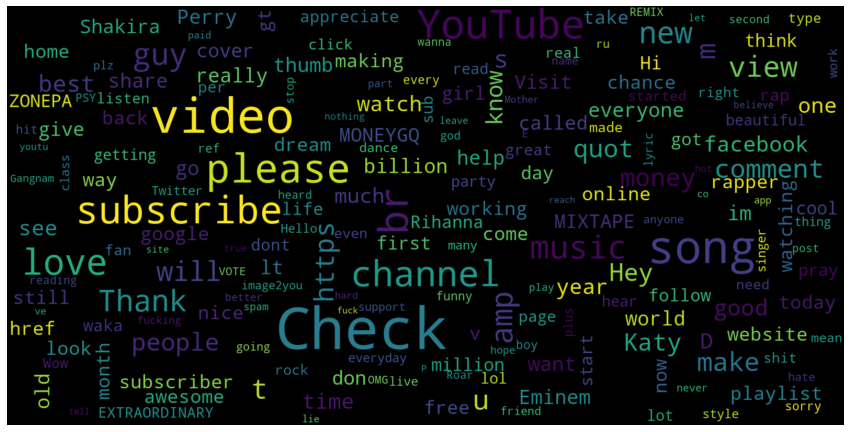

In [6]:
consolidated = ' '.join(
    word for word in train_data['CONTENT'].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

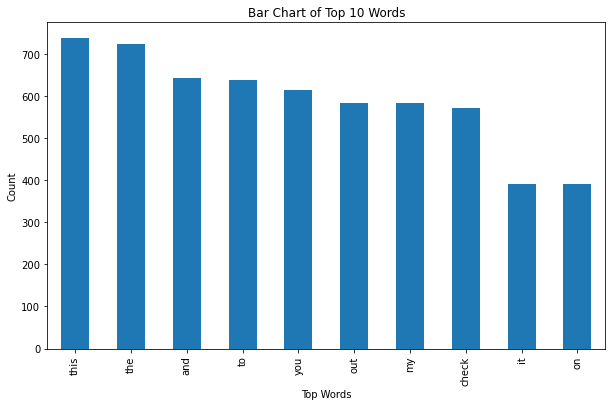

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(train_data['CONTENT'], 10)
df1 = pd.DataFrame(common_words, columns=['CONTENT', 'COUNT'])
  
df1.groupby('CONTENT').sum()['COUNT'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top 10 Words"
);

# Data Cleaning

1.Drop insignificant columns

2.Process the contents of data

3.Extract features from the data

In [8]:
def drop_features(features,data):
    data.drop(features,axis=1,inplace=True)

In [9]:
drop_features(['COMMENT_ID','AUTHOR','DATE'],train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [10]:
train_data.head()

,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [11]:
def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

In [12]:
train_data['Processed Content'] = train_data['CONTENT'].apply(process_content)
train_data.head()

,CONTENT,CLASS,Processed Content
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0,a href http www youtube com watch v kq zr kcpj...
1,wierd but funny﻿,0,wierd but funny
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1,hey guys i m a human br br br but i don t want...
3,Party Rock....lol...who wants to shuffle!!!﻿,0,party rock lol who wants to shuffle
4,Party rock﻿,0,party rock


In [13]:
drop_features(['CONTENT'],train_data)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data['Processed Content'],train_data['CLASS'],test_size=0.2,random_state=57)

In [15]:
x_train

90                          katy has conqueror s haki gt
261    omg can this be the first video on youtube to ...
146                        me and my aunt love this song
132                  https viralangels com user d aaacwk
282                                                  wow
                             ...                        
217    if you looking for new music to listen to chec...
406    like this comment guys i just started up a new...
143    at least she didn t get rid of her completely ...
144      check my channel out please i do singing covers
89     http www aaas org tech i vote view vote sheldo...
Name: Processed Content, Length: 1564, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)

In [18]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = tranformer.transform(x_test_counts)

# ML Modeling
We have completed cleaning of our data and we have training samples to train the model and testing samples to verify the accuracy of our models.

# Logistic Regression
Logistic regression is a simple statistical model which predicts a binary response. For this data, we are predicting whether a comment is a spam or not.

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)

LogisticRegression()

In [20]:
accuracy = model.score(x_test_tfidf, y_test)
print(accuracy)

0.9336734693877551


In [21]:
predictions = model.predict(x_test_tfidf)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
a=confusion_matrix(y_test,predictions)
print(a)

[[197  11]
 [ 15 169]]


<AxesSubplot:>

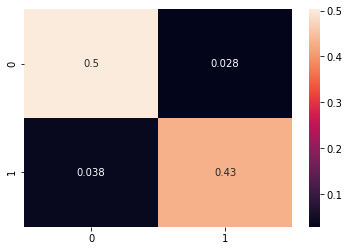

In [24]:
sns.heatmap(a/np.sum(a), annot=True)

# Random Forest Classifier
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier()
model.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [26]:
accuracy = model.score(x_test_tfidf, y_test)
print(accuracy)

0.951530612244898


In [27]:
predictions = model.predict(x_test_tfidf)

In [28]:
b=confusion_matrix(y_test,predictions)
print(b)

[[201   7]
 [ 12 172]]


<AxesSubplot:>

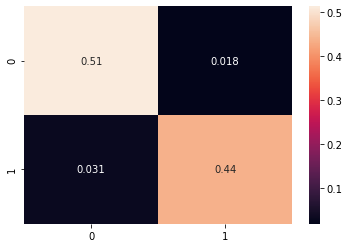

In [29]:
sns.heatmap(b/np.sum(b), annot=True)